In [1]:
# make all neccessary imports

import cbpro as cb
from cbpro.public_client import PublicClient
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# initialize the public client
pub = PublicClient()

# get data
dat = pd.DataFrame(pub.get_product_historic_rates(product_id='BTC-EUR'),
                   columns=['time','low','high','open','close','volume'])

# perform EDA on the retrieved data
dat.head()

,time,low,high,open,close,volume
0,1665074520,20476.87,20476.99,20476.87,20476.99,0.003240
1,1665074460,20472.05,20480.95,20472.05,20480.95,0.287444
2,1665074400,20471.02,20480.95,20477.54,20480.95,0.102460
3,1665074340,20468.88,20475.50,20469.53,20474.32,0.033659
4,1665074220,20463.77,20475.74,20463.77,20475.74,0.134072


In [3]:
# data wrangling
# extract the needed variable (columns) and convert to numpy arrays for easy manipulation
price = dat['close'].array 
pricechange = price[1:]-price[:-1]
pricechange = np.hstack((np.array([np.nan]),pricechange))
dat['pricechange'] = pricechange

      price        size  high
0  20479.25      0.0305     1
1  20477.18  0.03965074     1
2   20474.6  0.02360009     1
3  20474.59       0.059     1
4  20473.61   0.2039714     1
       price        size  high
95     20689    0.000142     1
96  20689.04  0.00125222     1
97  20689.84  0.00097813     1
98     20690    0.018233     1
99  20698.85  0.00009318     1
20350.6023
20563.1648


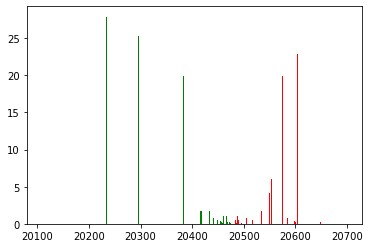

In [4]:
# pd.DataFrame(pub.get_product_order_book(product_id='BTC-EUR', level=2),
#             columns=['time','low','high'])

bids = pub.get_product_order_book(product_id='BTC-EUR', level=2)['bids']
asks = pub.get_product_order_book(product_id='BTC-EUR', level=2)['asks']

bids = pd.DataFrame(bids, columns=['price','size','high'])[:100]
asks = pd.DataFrame(asks, columns=['price','size','high'])[:100]
print(bids.head())
print(asks.tail())

bid_vol = bids.price.astype(float) * bids.size.astype('float')
ask_vol = asks.price.astype(float) * asks.size.astype('float')

print(bids['price'][:100].astype('float').mean())
print(asks['price'][:100].astype('float').mean())

x = np.linspace(0,100,num=100)
plt.bar(bids['price'][:100].astype('float'), bids['size'][:100].astype('float'), color='green') # buyers
plt.bar(asks['price'][:100].astype('float'), asks['size'][:100].astype('float'), color='red') # sellers
plt.show()

In [5]:
pub.get_product_ticker(product_id='BTC-EUR')

{'ask': '20481.35',
 'bid': '20479.25',
 'volume': '401.28520286',
 'trade_id': 67917821,
 'price': '20476.99',
 'size': '0.00005951',
 'time': '2022-10-06T16:42:04.230574Z'}

In [6]:
data = pub.get_product_trades(product_id='BTC-EUR', before='2022-09-13 12:00:00',
                        after='2022-09-13 12:02:00', limit=None, result=None)

trades = []
while True:
    if len(trades) >= 500:
        break
    trades.append(next(data))
data = pd.DataFrame(trades)[:450]
data['price'] = data['price'].astype('float')
data['size'] = data['size'].astype('float')
buy = data[(data.side == 'buy')]
#print(buy)

sell = data[(data.side == 'sell')]
#print(sell)

data['time'] = pd.to_datetime(data['time']).round('200L')
print(data)
print(buy.shape)
print(sell.shape)

                                time  trade_id     price      size  side
0   2022-10-06 16:42:04.200000+00:00  67917821  20476.99  0.000060  sell
1   2022-10-06 16:42:02.400000+00:00  67917820  20476.87  0.003180  sell
2   2022-10-06 16:41:57.200000+00:00  67917819  20480.95  0.000041  sell
3   2022-10-06 16:41:48.200000+00:00  67917818  20478.39  0.000400  sell
4   2022-10-06 16:41:42.400000+00:00  67917817  20478.63  0.000485  sell
..                               ...       ...       ...       ...   ...
445 2022-10-06 15:47:11.800000+00:00  67917376  20447.89  0.108998  sell
446 2022-10-06 15:47:11.800000+00:00  67917375  20447.50  0.167890  sell
447 2022-10-06 15:47:11.800000+00:00  67917374  20447.48  0.034356  sell
448 2022-10-06 15:47:11.800000+00:00  67917373  20445.72  0.059000  sell
449 2022-10-06 15:47:11.600000+00:00  67917372  20447.40  0.000006  sell

[450 rows x 5 columns]
(198, 5)
(252, 5)


In [7]:
size= data[['time','size', 'side']]
size=size.groupby(['time', 'side']).sum()[::-1]
tmp = size.index
size.index,size['side'] = tmp.get_level_values('time'),tmp.get_level_values('side')
size

,size,side
time,,
2022-10-06 16:42:04.200000+00:00,0.000060,sell
2022-10-06 16:42:02.400000+00:00,0.003180,sell
2022-10-06 16:41:57.200000+00:00,0.000041,sell
2022-10-06 16:41:48.200000+00:00,0.000400,sell
2022-10-06 16:41:42.400000+00:00,0.000485,sell
...,...,...
2022-10-06 15:48:12.400000+00:00,0.000382,buy
2022-10-06 15:48:00.400000+00:00,0.030500,buy
2022-10-06 15:47:11.800000+00:00,0.824202,sell


In [8]:
price = data[['time','price', 'side']]
price = price.groupby(['time']).first()[::-1]
print(price)

                                     price  side
time                                            
2022-10-06 16:42:04.200000+00:00  20476.99  sell
2022-10-06 16:42:02.400000+00:00  20476.87  sell
2022-10-06 16:41:57.200000+00:00  20480.95  sell
2022-10-06 16:41:48.200000+00:00  20478.39  sell
2022-10-06 16:41:42.400000+00:00  20478.63  sell
...                                    ...   ...
2022-10-06 15:48:16.400000+00:00  20460.58  sell
2022-10-06 15:48:12.400000+00:00  20455.28   buy
2022-10-06 15:48:00.400000+00:00  20454.62   buy
2022-10-06 15:47:11.800000+00:00  20450.28  sell
2022-10-06 15:47:11.600000+00:00  20447.40  sell

[283 rows x 2 columns]


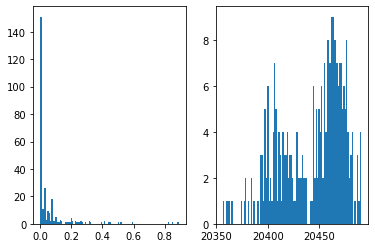

In [9]:
fig, axs = plt.subplots(1,2)
axs[0].hist(size['size'], bins=100)
axs[1].hist(price['price'], bins=100)
plt.show()

In [10]:
# find b as discussed
import datetime as dt
n = len(price)
times = pd.to_datetime(data['time'])
# dt.datetime(time_diff)
diff = times.iloc[0] - times.iloc[-1]
diff = diff.total_seconds()

b = (n-1)/diff
1/b

11.675886524822696

In [11]:
pb = price[price['side']=='buy']
ps = price[price['side']=='sell']

29.624074074074077


(0, 20)

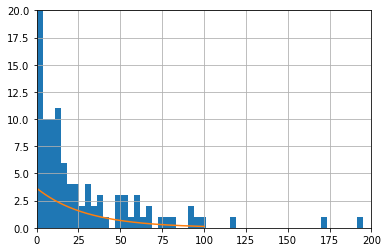

In [12]:
timeb = pd.to_datetime(pb.index)
pd.Series((timeb[:-1]-timeb[1:]).total_seconds()).hist(bins=100)
bb = (timeb.shape[0]-1)/(timeb[0]-timeb[-1]).total_seconds()
print(1/bb)
tmp = np.arange(0,100,0.01)
plt.plot(tmp,bb*np.exp(-bb*tmp)*(timeb.shape[0]-1)*100/100)
plt.xlim((0,200))
plt.ylim((0,20))

19.03236994219653


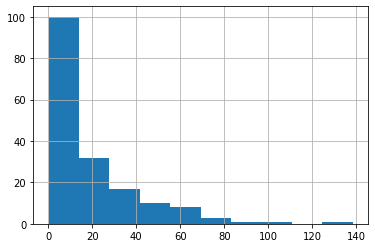

In [13]:
times = pd.to_datetime(ps.index)
pd.Series((times[:-1]-times[1:]).total_seconds()).hist()
bs = (times.shape[0]-1)/(times[0]-times[-1]).total_seconds()
print(1/bs)

<ipython-input-14-c098a29ef6bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb.drop(labels=pb.index[-1],axis=0,inplace=True)
<ipython-input-14-c098a29ef6bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb['pchange'] = tmp[:-1]-tmp[1:]


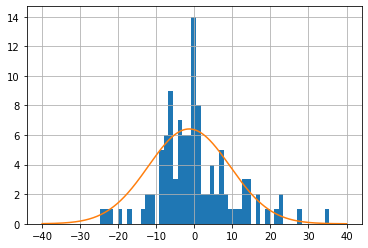

In [14]:
tmp = pb['price'].array.copy()
pb.drop(labels=pb.index[-1],axis=0,inplace=True)
pb['pchange'] = tmp[:-1]-tmp[1:]
pb['pchange'].hist(bins=50)
import scipy.stats as stats
tmp = np.linspace(-40,40,1000)
plt.plot(tmp,stats.norm.pdf(tmp,-1.362982,10.751931)*pb.shape[0]*80/50)

In [15]:
tmp = ps['price'].array.copy()
ps.drop(labels=ps.index[-1],axis=0,inplace=True)
ps['pchange'] = tmp[:-1]-tmp[1:]

<ipython-input-15-f642b36795f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps.drop(labels=ps.index[-1],axis=0,inplace=True)
<ipython-input-15-f642b36795f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps['pchange'] = tmp[:-1]-tmp[1:]


In [16]:
tmp = pb['pchange']
muyb,sigmab2 = tmp.mean(),(tmp.std())**2
tmp.describe()

count    108.000000
mean       0.161389
std       10.020389
min      -24.930000
25%       -5.862500
50%       -0.575000
75%        4.815000
max       35.500000
Name: pchange, dtype: float64

In [17]:
tmp = ps['pchange']
muys,sigmas2 = tmp.mean(),(tmp.std())**2
tmp.describe()

count    173.000000
mean       0.171040
std        7.880216
min      -37.010000
25%       -3.700000
50%        0.120000
75%        3.950000
max       23.570000
Name: pchange, dtype: float64

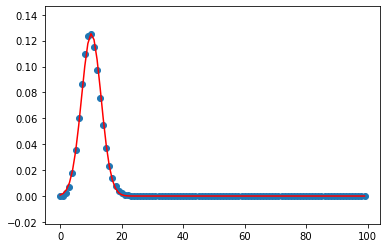

In [18]:
from scipy.special import factorial
t = 300
tmp = np.arange(100)
plt.scatter(tmp,(bb*t)**tmp*np.exp(-bb*t)/factorial(tmp))
plt.plot(tmp,stats.norm.pdf(tmp,bb*t,(bb*t)**0.5),color='r')

In [19]:
def pcase(i,j):
    return stats.norm.cdf(0,i*muyb+j*muys,(i*sigmab2+j*sigmas2)**0.5)

def rangePoisson(L):
    return range(max((0,int(L-3.5*L**0.5))),int(L+3.5*L**0.5))

T = 300
Lb,Ls = bb*T,bs*T
Pdecrease,cover = 0,0
for i in rangePoisson(Lb):
    for j in rangePoisson(Ls):
        case = stats.poisson.pmf(i,Lb)*stats.poisson.pmf(j,Ls)
        cover += case
        Pdecrease += case*stats.norm.cdf(0,loc=i*muyb+j*muys,scale=(i*sigmab2+j*sigmas2)**0.5)
print(cover)
print(Pdecrease)

0.9963902718912239
0.4599055434386199
